### Installing ucimlrep

In [1]:
#pip install ucimlrepo

### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import os
import joblib
from scipy import stats
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

C:\Users\nikde\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Fetching and Understanding the spambase dataset from the UCI Repository

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 

#storing the variables data to attributes
attributes = spambase.variables 


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [4]:
# Specify the file path where you want to save the file
file_path = os.path.join("C:/Users/nikde/Documents/UpGrad/spammail/data/rawdata", "features_data.csv")

# Save the features dataframe as a CSV file
X.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index

In [5]:
# Specify the file path where you want to save the file
file_path = os.path.join("C:/Users/nikde/Documents/UpGrad/spammail/data/rawdata", "targets_data.csv")

# Save the features dataframe as a CSV file
y.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index

In [6]:
# Specify the file path where you want to save the file
file_path = os.path.join("C:/Users/nikde/Documents/UpGrad/spammail/data/rawdata", "README.csv")

# Save the features dataframe as a CSV file
attributes.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index

In [7]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [8]:
y.head()

,Class
0,1
1,1
2,1
3,1
4,1


#### Merging the features with the target to understand data and perform EDA

In [9]:
df = X.join(y)

In [10]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [12]:
# Creating a copy of df for comparison purposes
df_copy = df.copy()

In [13]:
# Verifying the copy of df
df_copy.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [14]:
df.isna().sum()/len(df)

word_freq_make                0.0
word_freq_address             0.0
word_freq_all                 0.0
word_freq_3d                  0.0
word_freq_our                 0.0
word_freq_over                0.0
word_freq_remove              0.0
word_freq_internet            0.0
word_freq_order               0.0
word_freq_mail                0.0
word_freq_receive             0.0
word_freq_will                0.0
word_freq_people              0.0
word_freq_report              0.0
word_freq_addresses           0.0
word_freq_free                0.0
word_freq_business            0.0
word_freq_email               0.0
word_freq_you                 0.0
word_freq_credit              0.0
word_freq_your                0.0
word_freq_font                0.0
word_freq_000                 0.0
word_freq_money               0.0
word_freq_hp                  0.0
word_freq_hpl                 0.0
word_freq_george              0.0
word_freq_650                 0.0
word_freq_lab                 0.0
word_freq_labs

In [15]:
df['Class'].unique()

array([1, 0], dtype=int64)

In [16]:
#df['word_freq_make'] = df['word_freq_make'].apply(lambda x : 1 if x>=0.5 else 0)

### Performing Explorartory Data Analysis

In [17]:
# Define a folder to save visualizations
visuals_folder = "C:/Users/nikde/Documents/UpGrad/spammail/visuals"

In [18]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [19]:
df['Class'].value_counts()

Class
0    2788
1    1813
Name: count, dtype: int64

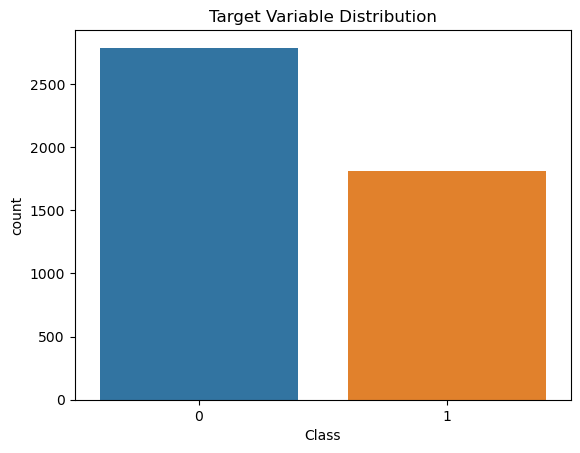

In [20]:
sns.countplot(data=df, x='Class')
plt.title('Target Variable Distribution')

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "target_distribution.png"))

plt.show()

While Class 0 has more samples than Class 1, the difference is not extreme. Typically, a dataset is considered "imbalanced" when one class is less than 10-20% of the total, or when the class distribution is significantly skewed. In this case, the dataset is somewhat imbalanced, but not drastically so. (Class 0 has a proportion of 61% of values whereas class 1 has 39%).

#### Checking the distribution of all word frequencies with respect to the target variable

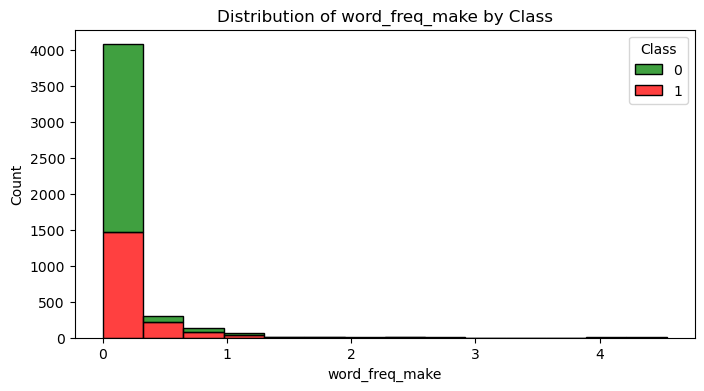

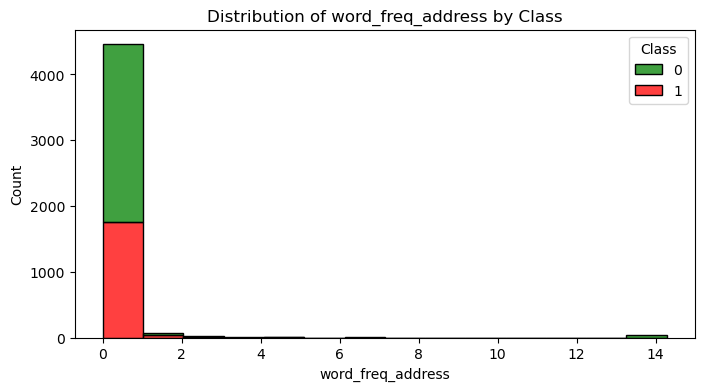

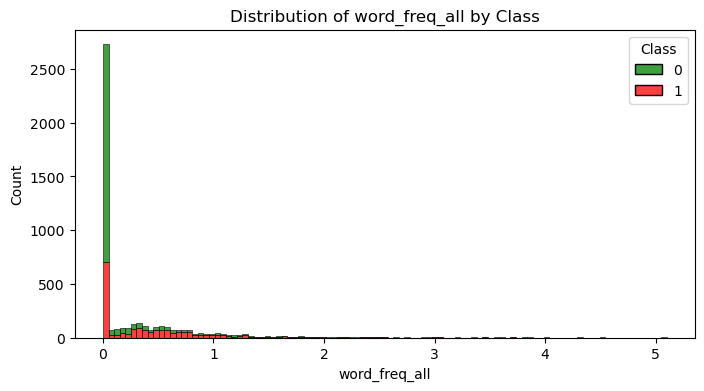

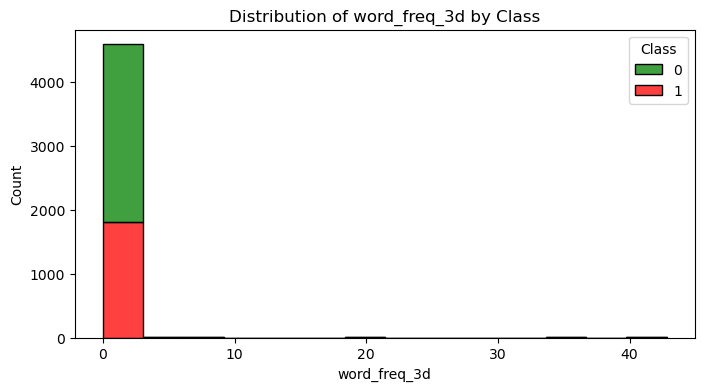

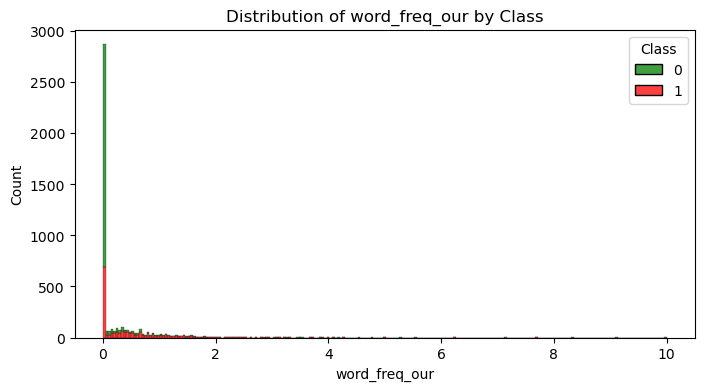

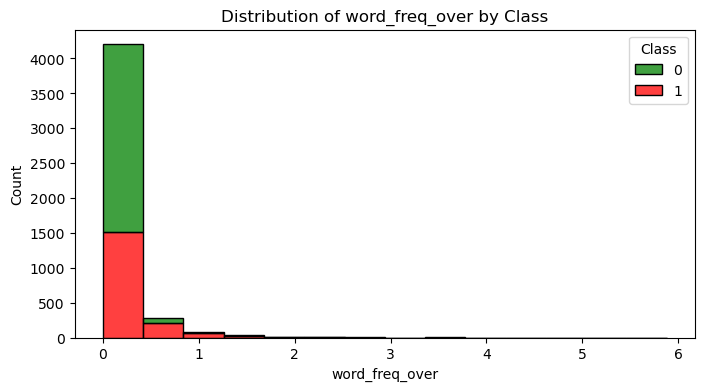

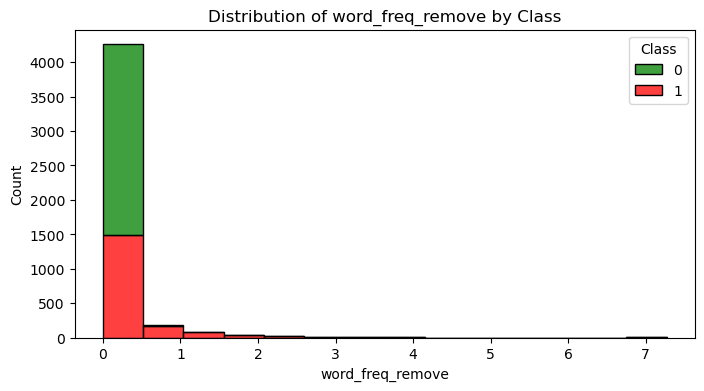

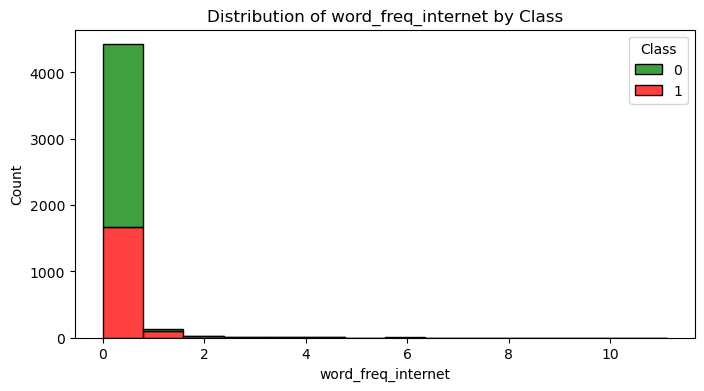

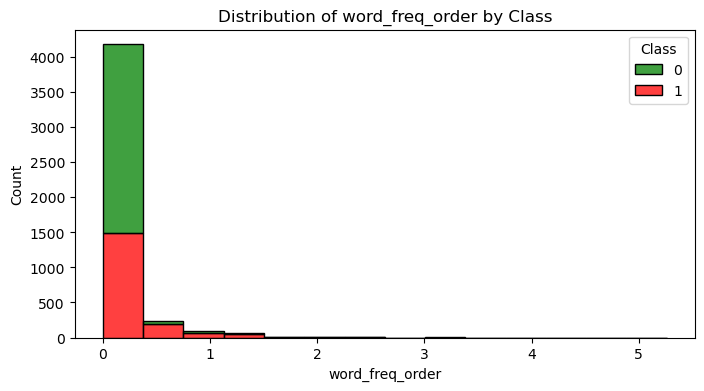

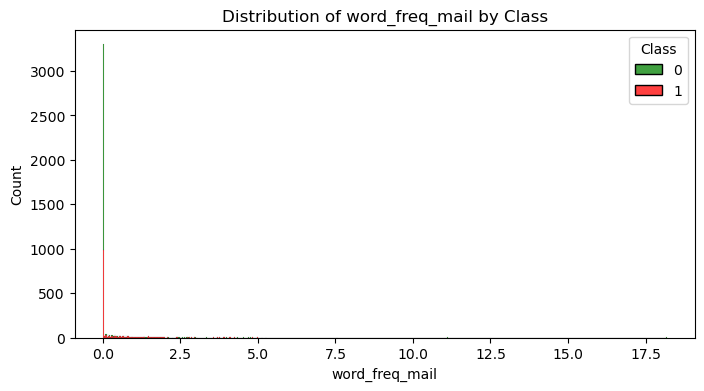

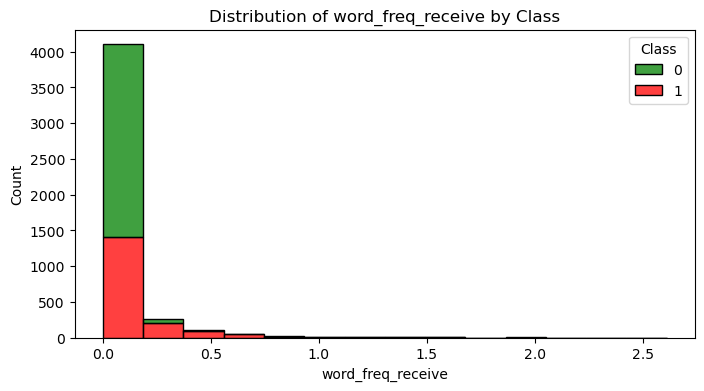

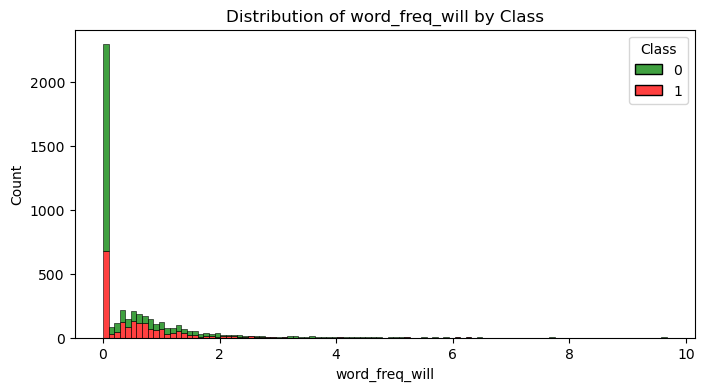

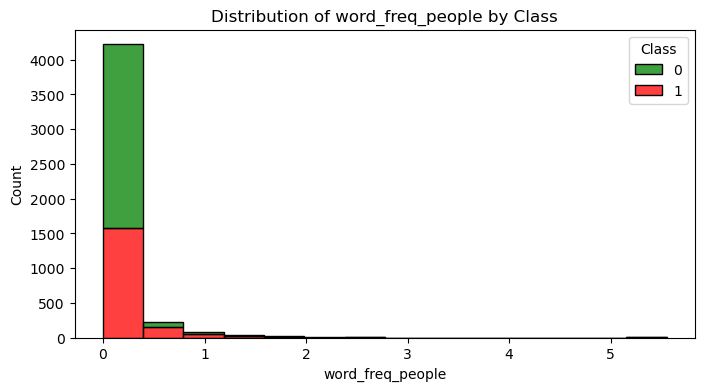

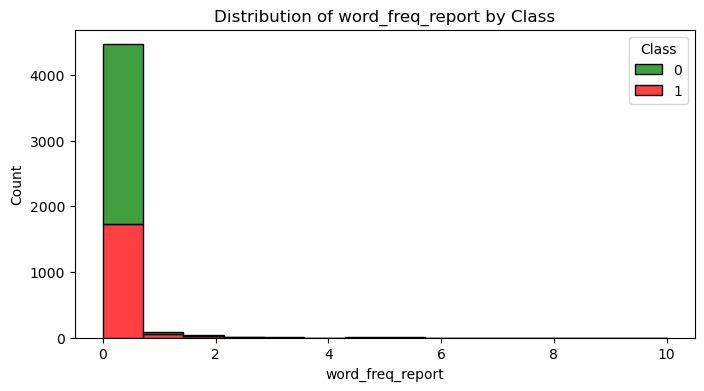

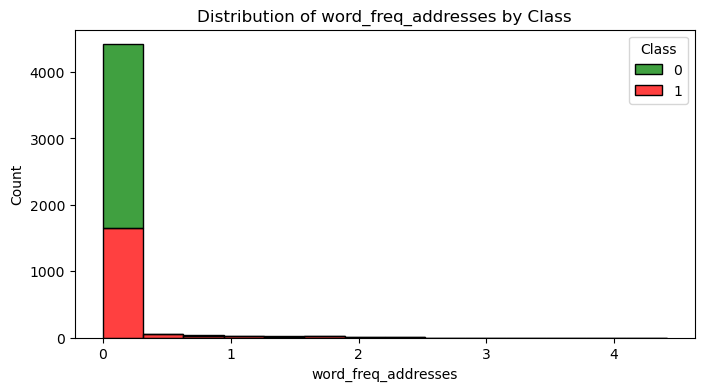

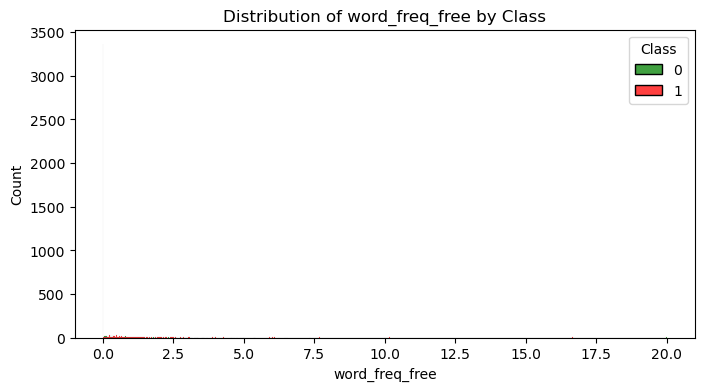

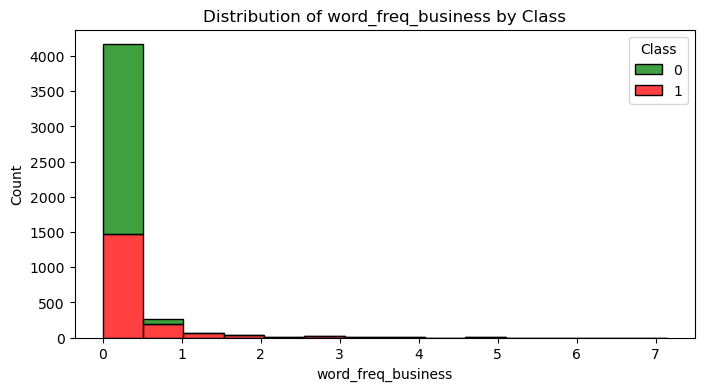

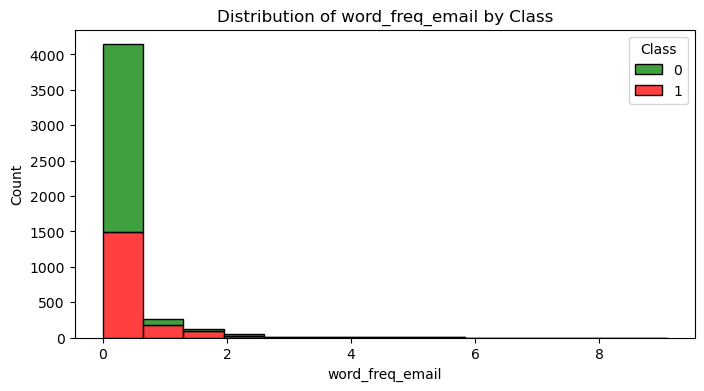

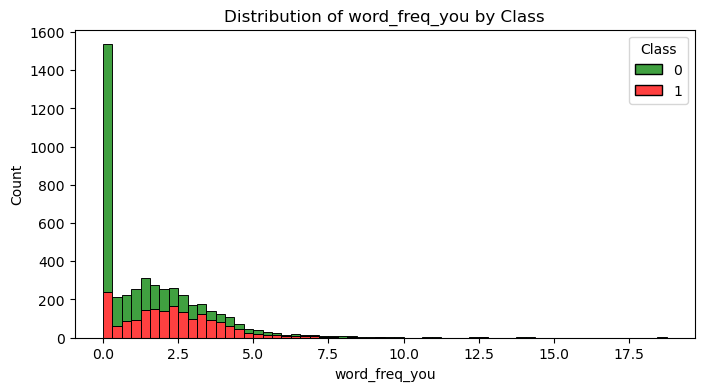

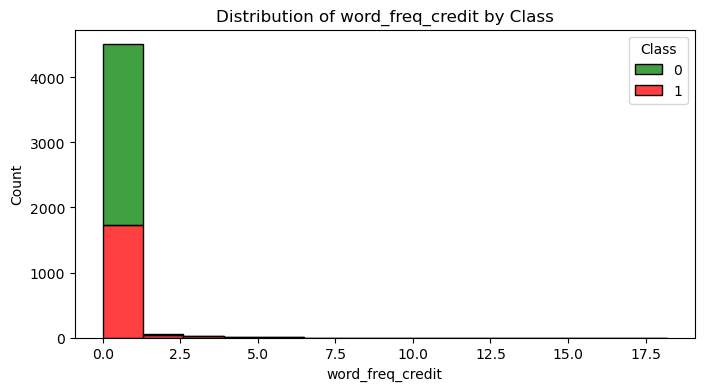

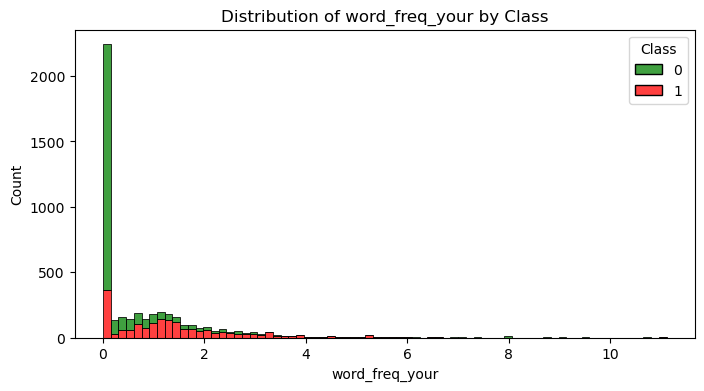

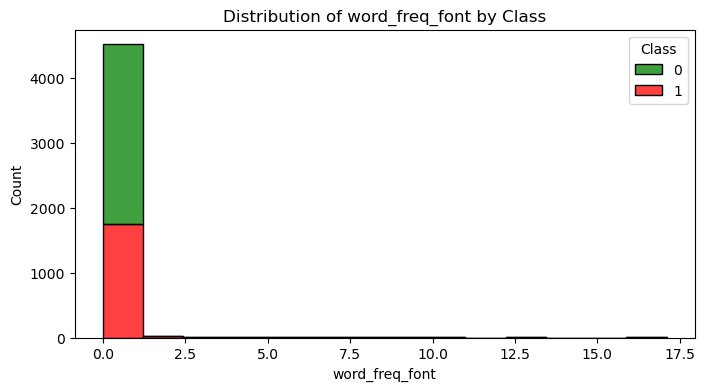

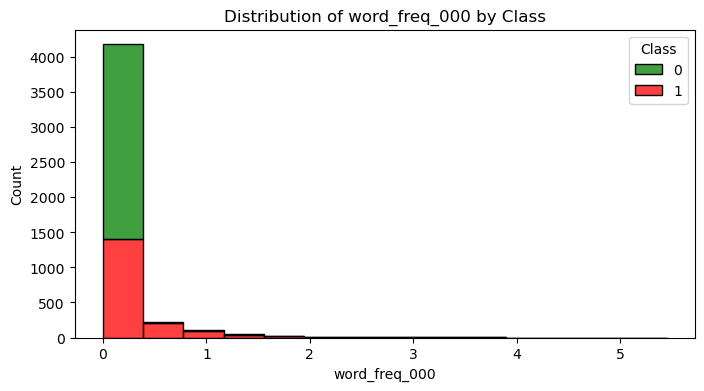

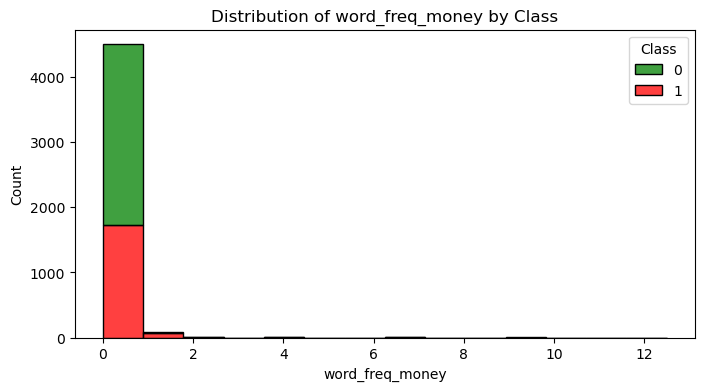

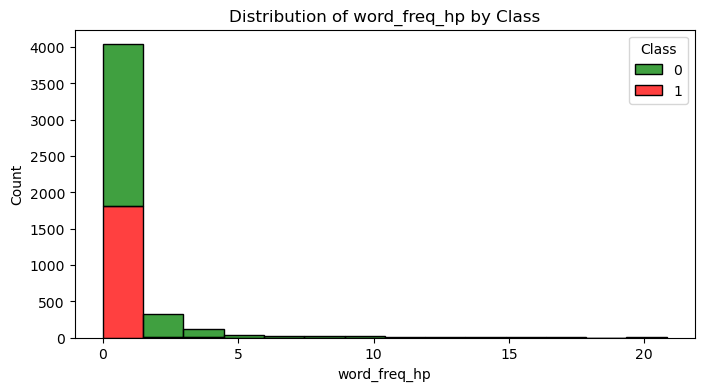

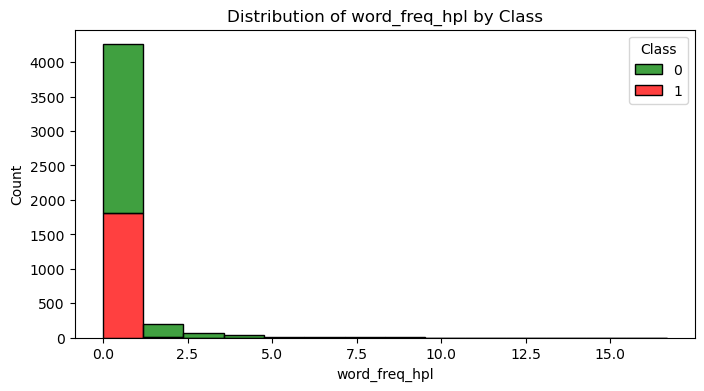

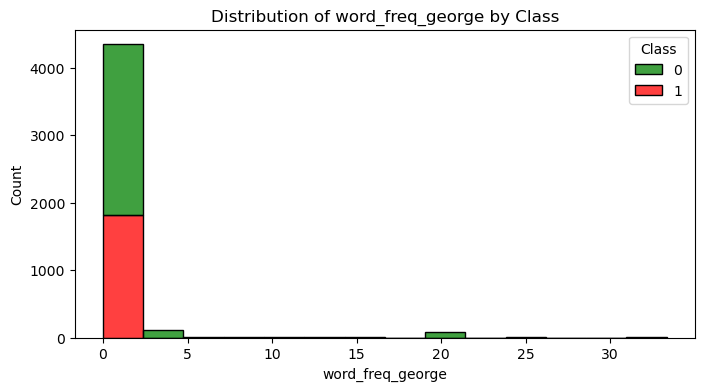

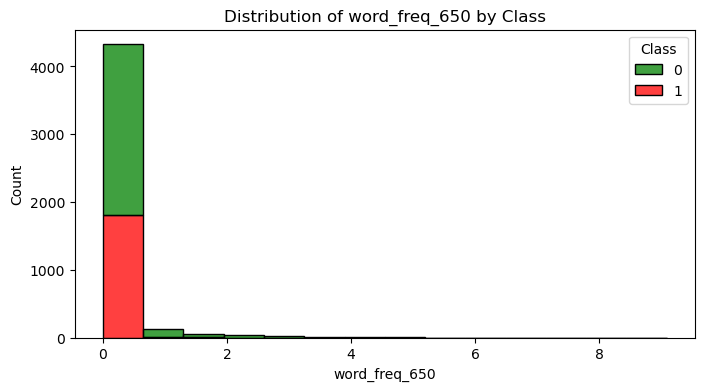

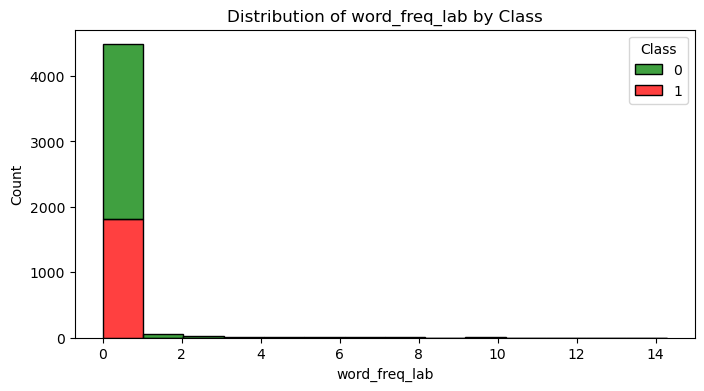

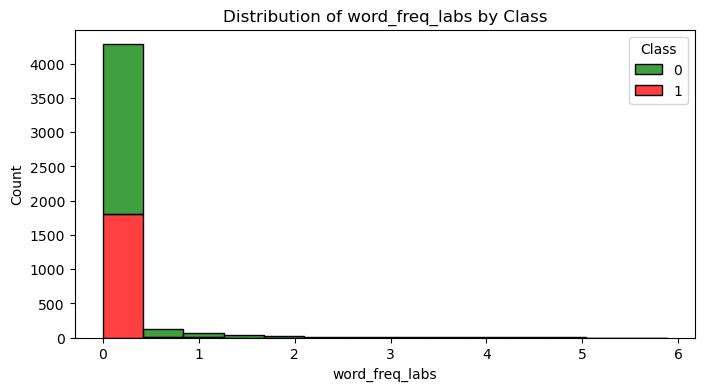

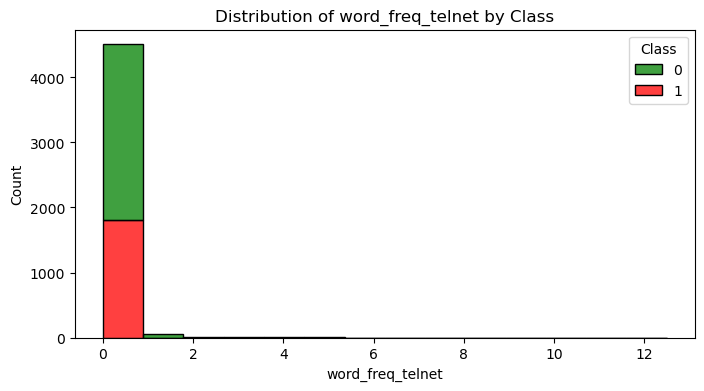

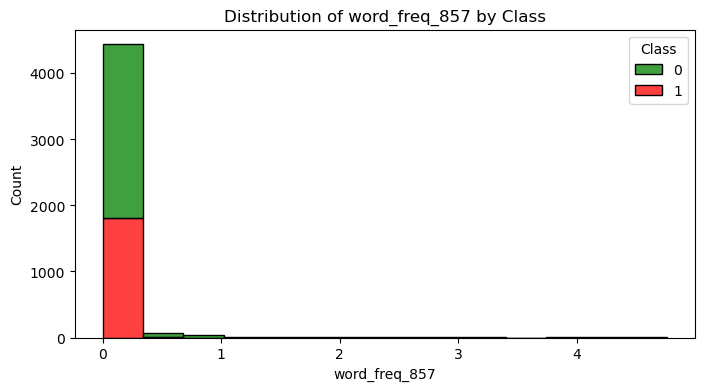

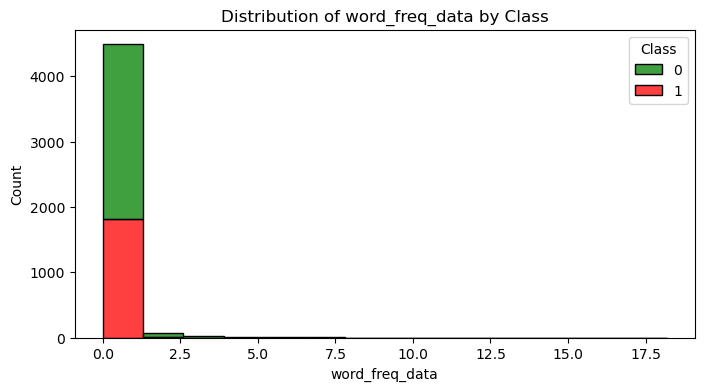

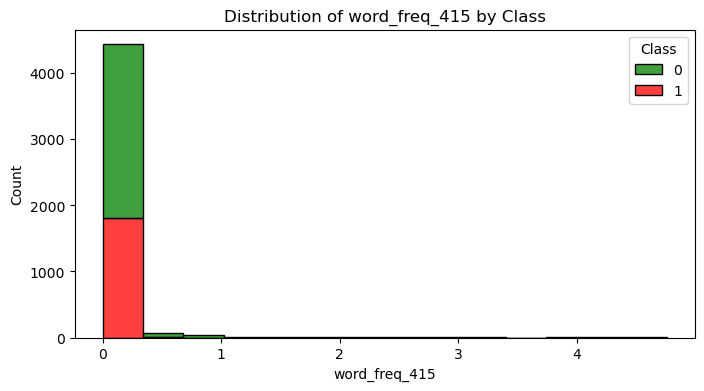

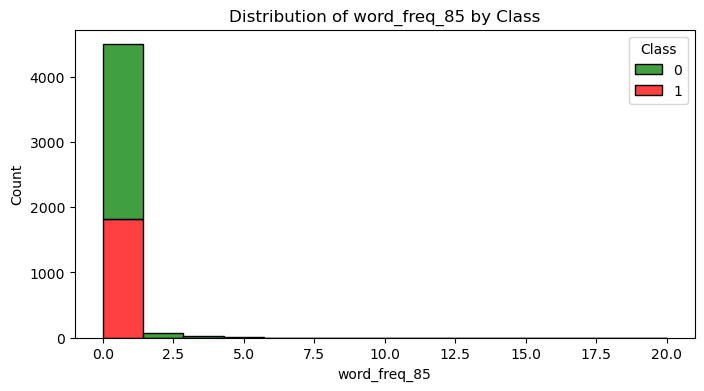

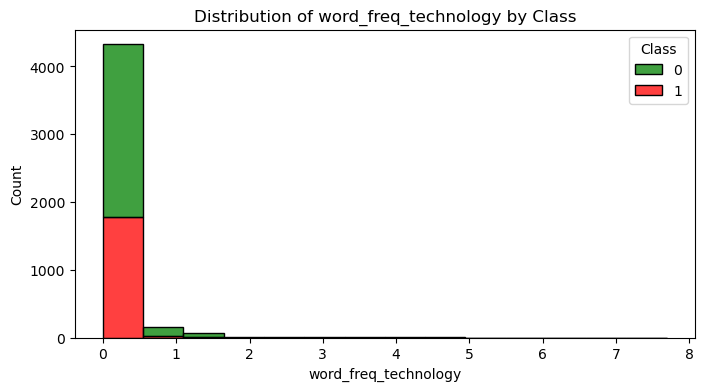

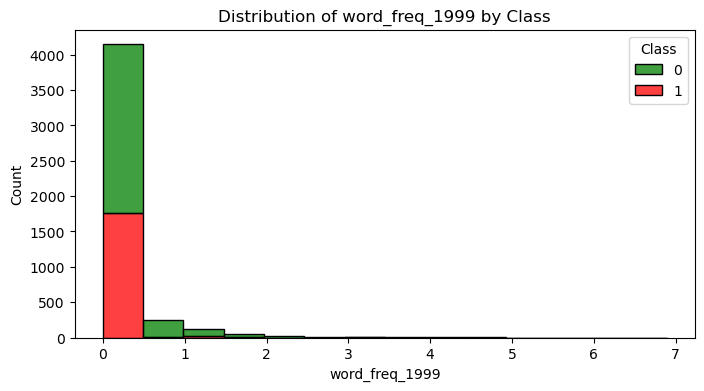

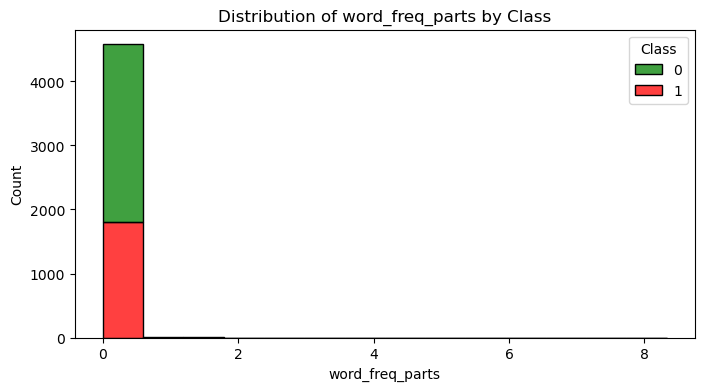

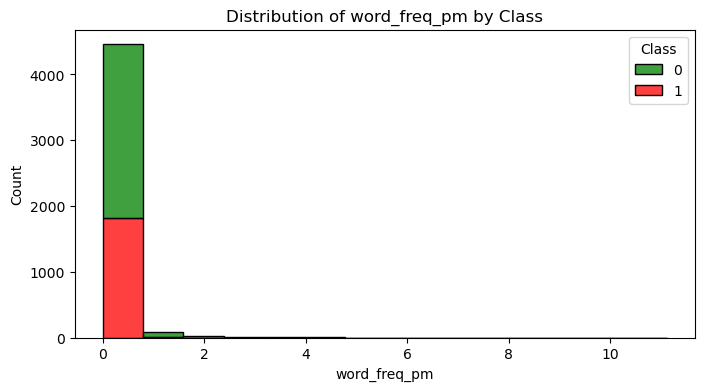

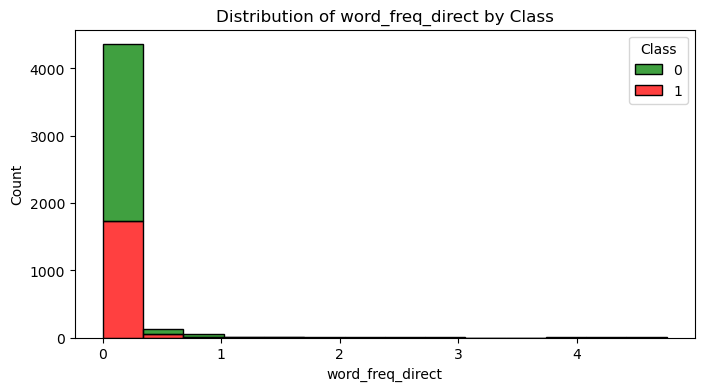

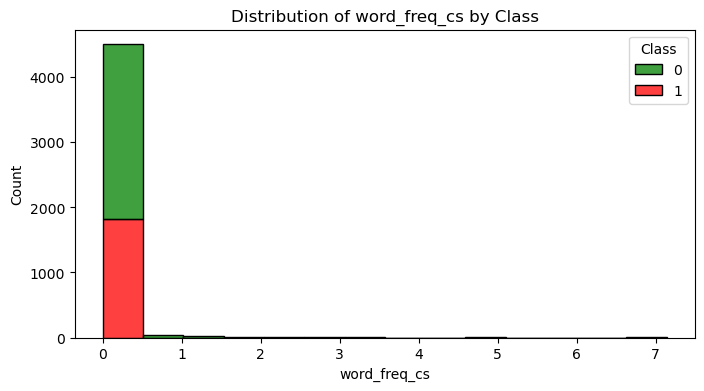

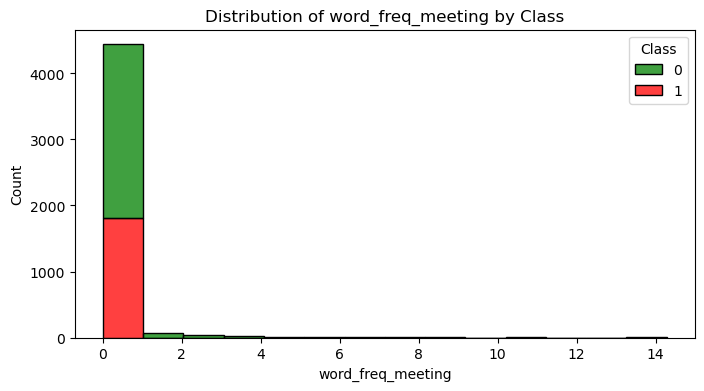

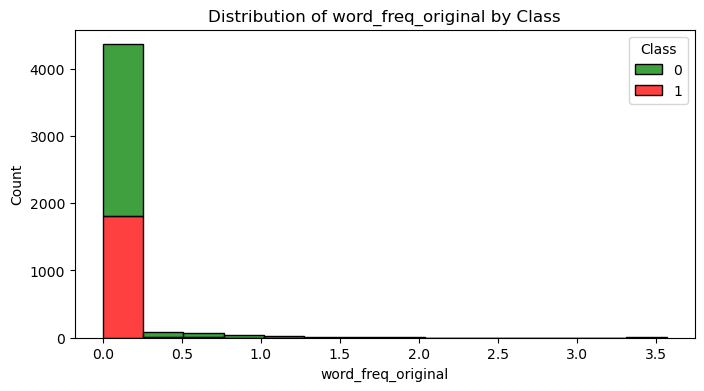

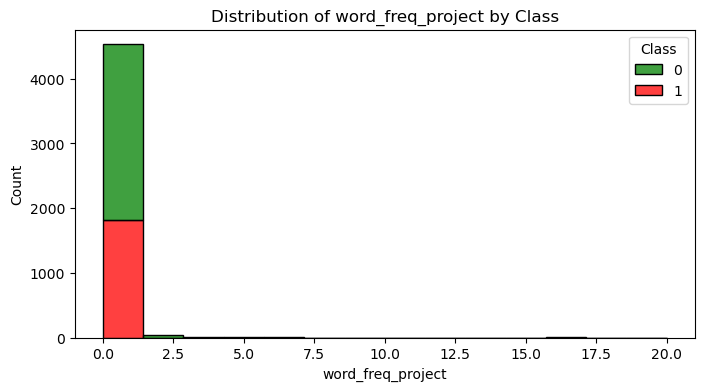

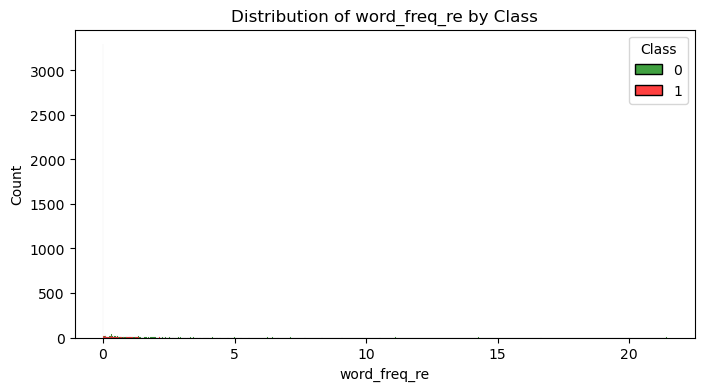

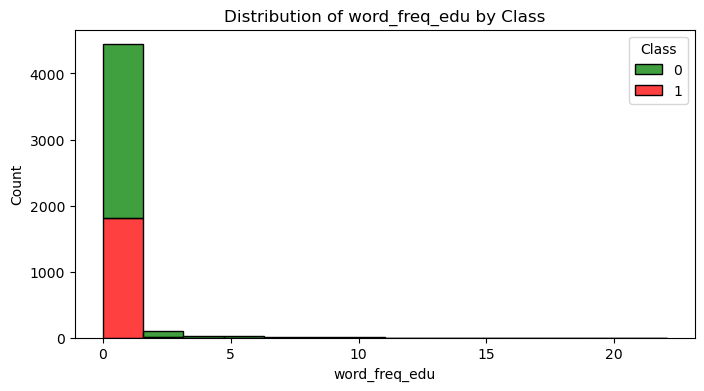

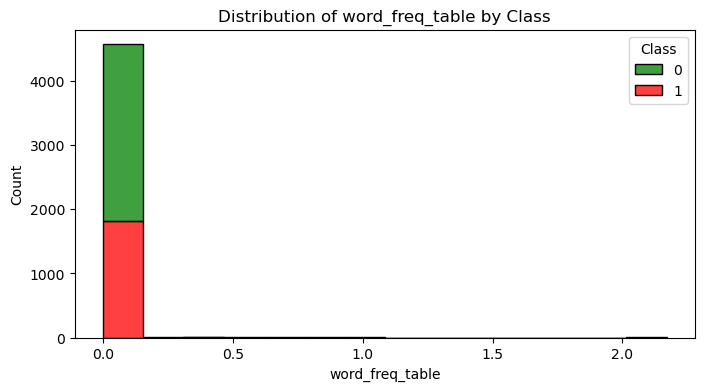

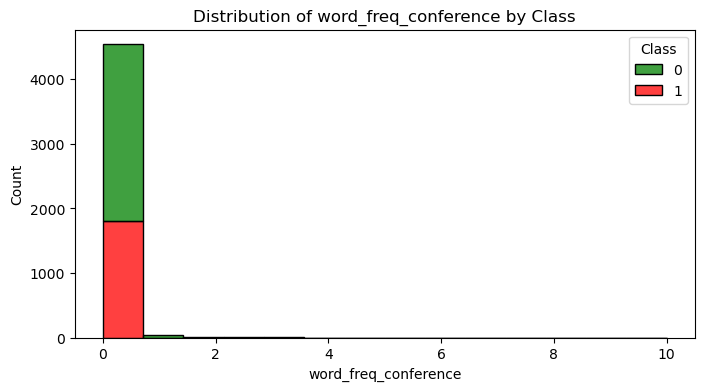

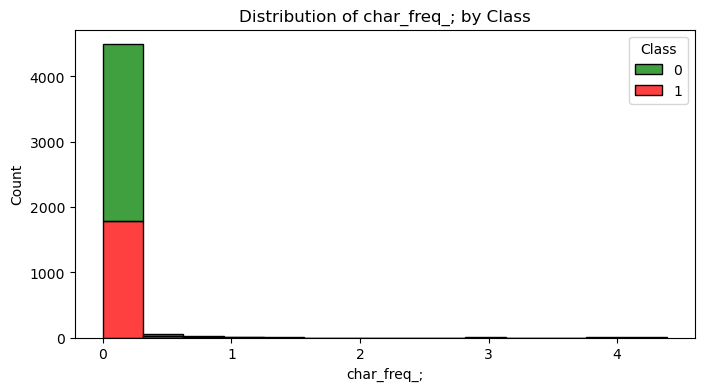

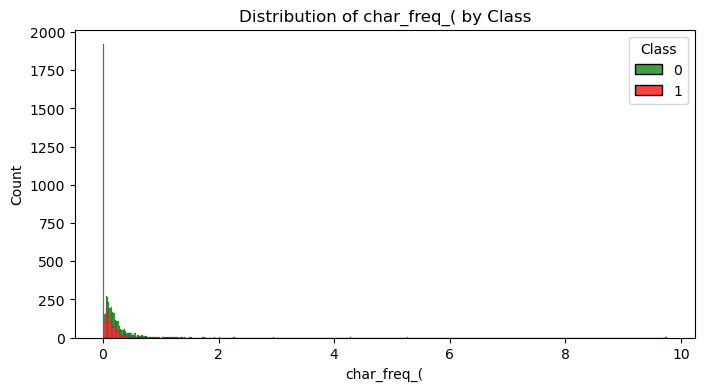

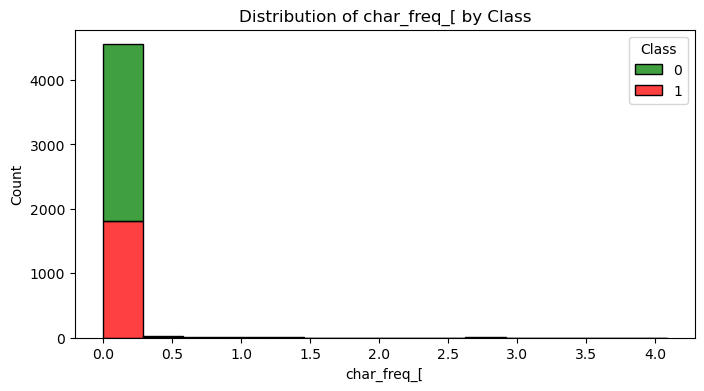

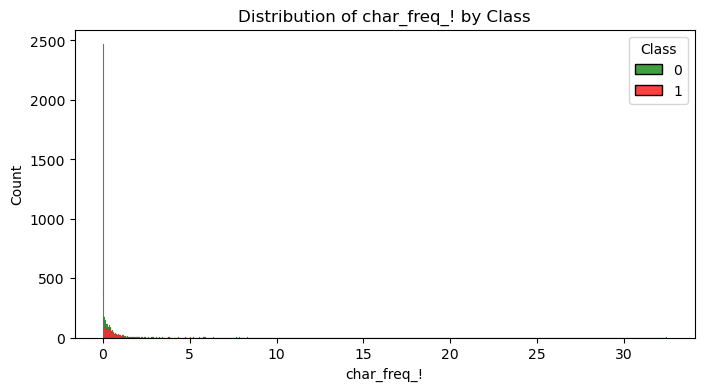

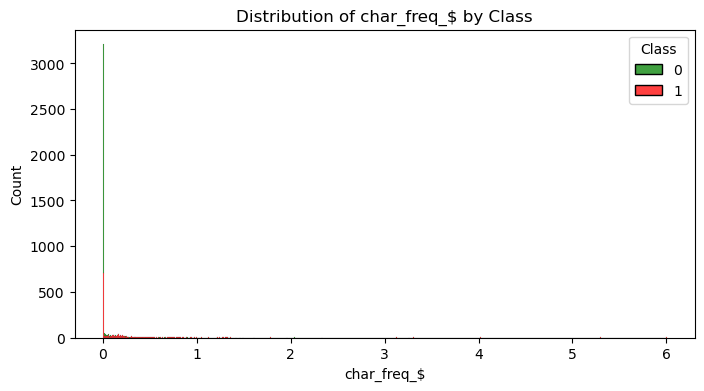

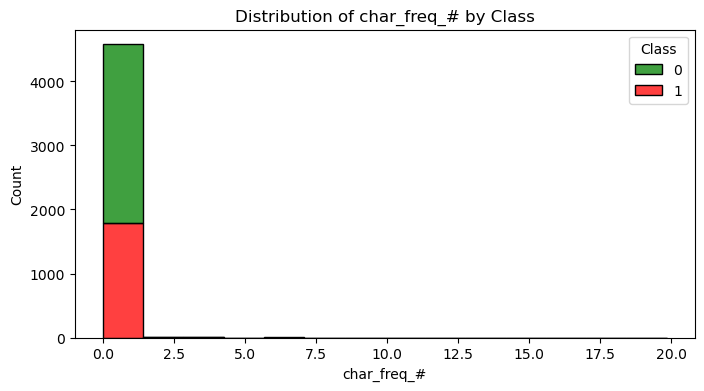

In [21]:
# Loop through each feature
for col in df.columns[:-4]:  # Assuming the last column is 'Class'
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='Class', palette={0: 'green', 1: 'red'}, multiple='stack')
    plt.title(f'Distribution of {col} by Class')
    # Save the figure automatically with an appropriate name
    plt.savefig(os.path.join(visuals_folder, f"{col}_distribution_by_class.png"))
    plt.show()


We can see that words 
1) make 2) address 3) all 4) our 5) over 6) remove 7) internet 8) order 9) mail 10) receive 11) will 12) people 13) report
14) addresses 15) free 16) business 17) email 18) you 19) credit 20) your 21) 000 22) money 23) re 24) ! 25) $ 
are spam words when they occur with a frequency greater than 0.5.

#### Plotting the heatmap of the correlation matrix to detect columns with high correlation

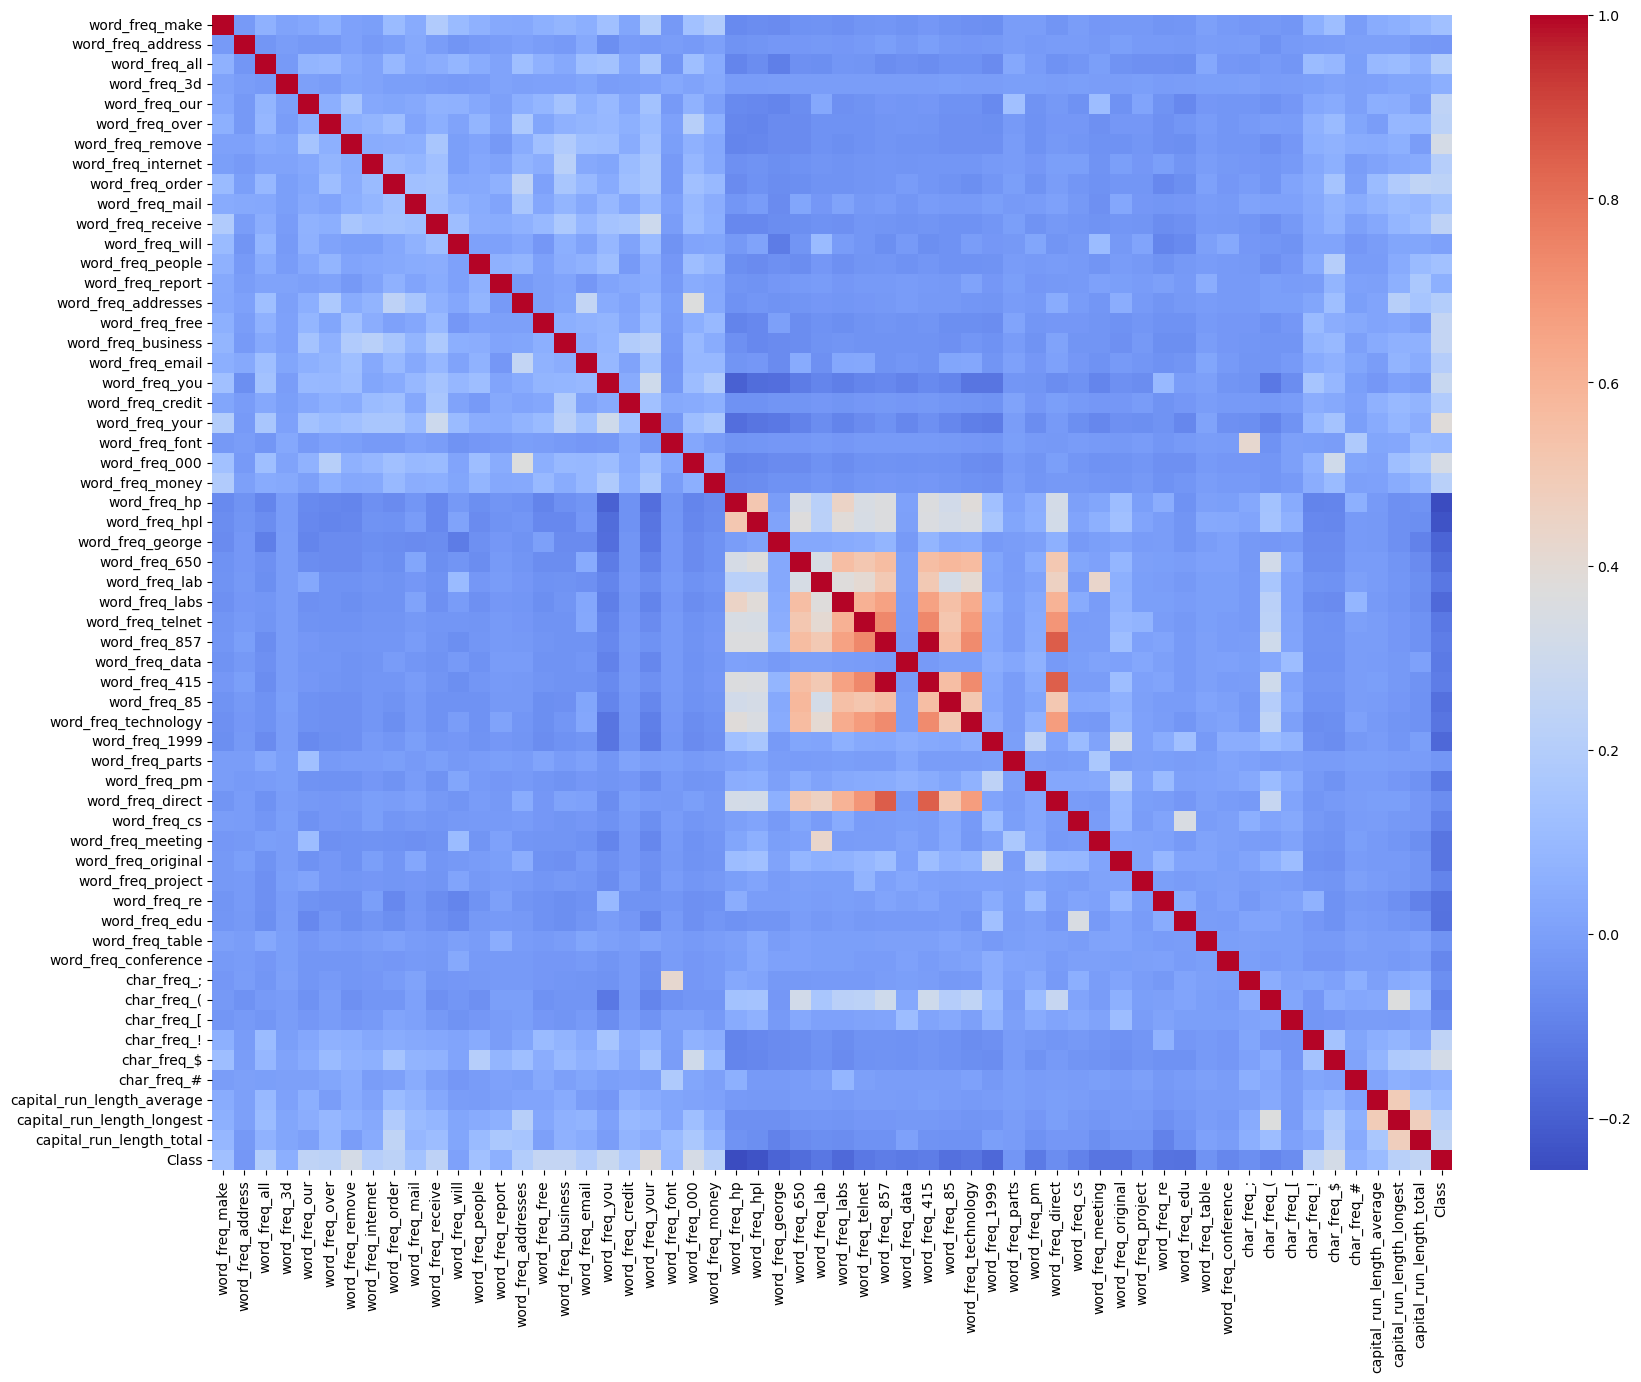

In [22]:
# Set the figure size large enough to accommodate all features
plt.figure(figsize=(20, 15))  # Adjust size depending on readability
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "correlation_heatmap.png"))
plt.show()

#### Identifying columns with high correlation

In [23]:
# Define your threshold for high correlation
threshold = 0.75

# Create a boolean mask for correlations above the threshold
high_corr_mask = np.abs(corr) > threshold

# Drop self-correlations by setting diagonal to False
np.fill_diagonal(high_corr_mask.values, False)

# Get feature pairs with high correlation
high_corr_pairs = [(i, j) for i in range(len(corr.columns)) 
                   for j in range(i) 
                   if high_corr_mask.iloc[i, j]]

# Print high correlation pairs and their values
for i, j in high_corr_pairs:
    print(f"Feature {corr.columns[i]} and Feature {corr.columns[j]} have a correlation of {corr.iloc[i, j]:.2f}")

Feature word_freq_415 and Feature word_freq_857 have a correlation of 1.00
Feature word_freq_direct and Feature word_freq_857 have a correlation of 0.85
Feature word_freq_direct and Feature word_freq_415 have a correlation of 0.85


We can thus remove any 2 of these 3 features that are highly co-related.

### Feature Engineering

In [24]:
df = df.drop(columns = ['word_freq_415', 'word_freq_857'], axis = 1)

In [25]:
df.shape

(4601, 56)

#### Transforming right-skewed data can be beneficial, especially for certain types of models, but it’s not always necessary. Here are some considerations for whether to transform right-skewed data when using a Random Forest classifier:

When to Consider Transforming Right-Skewed Data:

Improving Model Interpretability: Transforming skewed data can help in making the relationships between features and the target more linear, which might improve interpretability, though this is less critical for tree-based models.

Feature Importance: Transforming skewed features might improve the feature importance estimates, as the trees might be more effective at capturing relationships in more normally distributed data.

Other Models: If you plan to use models that assume normality or are sensitive to skewness (like linear regression), it’s beneficial to transform the data.

When You Might Skip Transformation:
Tree-Based Models: Since Random Forest and other tree-based models handle non-linear relationships well, they are typically robust to the effects of skewness.

Retaining Original Data Distributions: In cases where the original distribution is important for interpretation or when you want to maintain the actual distribution of the data for decision-making, you might choose to leave it untransformed.

Recommended Approach:
Check Feature Distribution: If the skewness is significant (e.g., skewness > 1), consider applying transformations like log, square root, or Box-Cox/Yeo-Johnson to the skewed features.

Experiment with and without Transformation: You can train your Random Forest model on both the original skewed data and the transformed data. Compare the performance metrics (like accuracy, precision, recall, etc.) to see if the transformation improves results.

#### Encoding is not necessary as all columns except the target (binary) are continuous.

#### For Random Forest classification, scaling is generally not necessary. Here’s why:

Reasons Why Scaling is Not Needed:

Tree-Based Models: Random Forest is based on decision trees, which are not sensitive to the scale of the input features. The splitting decisions in trees are based on thresholds, which do not depend on the magnitude of the feature values.

Performance: Since Random Forest inherently handles features with different scales, applying scaling might not improve performance and can sometimes even add unnecessary computational overhead.

When to Consider Scaling:
While scaling isn't required, you might consider it in specific scenarios, such as:

If you plan to use other algorithms that are sensitive to feature scales (like SVM, KNN, or Logistic Regression) alongside Random Forest.

If you want to visualize the feature importance or coefficients where the relative scales might matter.
Recommended Practice:

If you only plan to use Random Forest, you can skip scaling. If you're using multiple algorithms in your workflow, you might consider standardizing or normalizing the features at the beginning. Here's how you could do that:

Conclusion:
While it’s not strictly necessary to transform right-skewed data for Random Forest, doing so can sometimes improve model performance and interpretation. It’s worth experimenting to see what works best for your specific dataset.

#### Storing the processed data to a csv file in the project's data folder¶`

In [26]:
# Specify the file path where you want to save the file
file_path = os.path.join("C:/Users/nikde/Documents/UpGrad/spammail/data/processeddata", "processed_data.csv")

# Save the datasets dataframe as a CSV file
df.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index

### Performing Train-Test split on the dataset

In [27]:
# Separate features (X) and target (y)
X = df.drop(columns=['Class'])  # Replace 'target' with the actual name of your target column
y = df['Class']

In [28]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3680, 55)
y_train (3680,)
X_test (921, 55)
y_test (921,)


### Model Training and Evaluation

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)


##### Accuracy

In [31]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9565689467969598


##### F1 Score

In [32]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       531
           1       0.97      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.96       921
weighted avg       0.96      0.96      0.96       921



##### Confusion Matrix

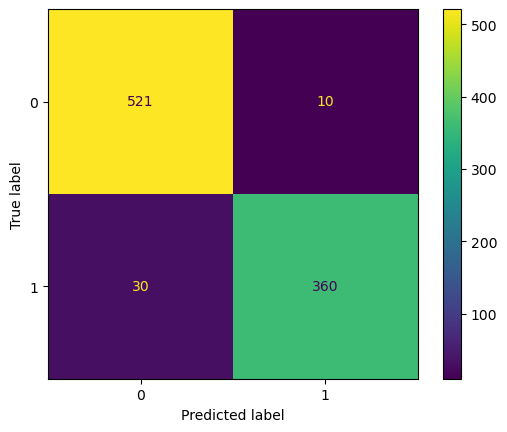

In [33]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

# Plot the confusion matrix
disp.plot()

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Confusion_Matrix.png"))
plt.show()

##### Training Accuracy

In [34]:
train_accuracy = rf_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.9994565217391305


##### ROC Curve

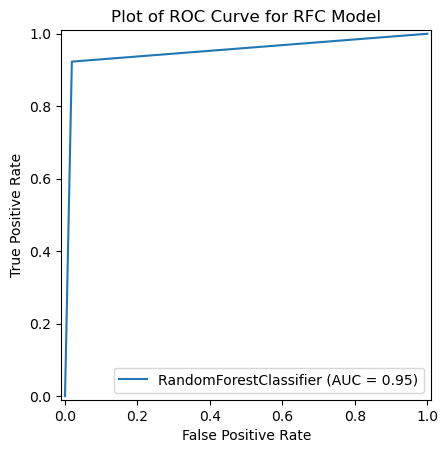

In [35]:
# Assuming y_test are the true binary labels
# and y_pred are the probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create RocCurveDisplay
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RandomForestClassifier')

# Plot the ROC curve
display.plot()
plt.title("Plot of ROC Curve for RFC Model")

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Plot of ROC Curve for RFC Model.png"))
plt.show()

#### Cross-Val Score

In [36]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.94679696 0.9423913  0.95978261 0.97065217 0.83369565]
Mean CV Score: 0.9306637397913422


1. Score Variation:
The scores range from 0.8337 to 0.9707. This variation indicates that the model performs well on some folds (as high as ~97%) but struggles a bit on others (as low as ~83%).
The lowest score (0.8337) suggests that on certain subsets of the data, the model has difficulty generalizing or handling specific patterns in the data. 

This might be due to:
Differences in the distribution of the data in certain folds.
Certain features not being as predictive on some portions of the data.

2. Mean CV Score:
The mean cross-validation score is ~0.931, which is still quite good and suggests that, on average, the model is performing well.
However, the variation in individual fold scores implies there might be some degree of overfitting or sensitivity to certain data splits.

3. High Standard Deviation:
The difference between the highest (0.97) and lowest (0.83) score is significant, implying a high standard deviation in model performance across folds.
This variation may suggest that the model is sensitive to specific patterns in the training data, which might affect its robustness when deployed in the real world.

4. Potential Overfitting:
Since the individual fold scores range widely, it’s possible that the model is overfitting on certain folds (especially where you get 97% accuracy). When the data distribution changes, it performs worse (e.g., 83%).

How to Proceed:
Investigate Fold Disparity: Check the data in the fold with the lowest score (0.8337) to see if there’s something unique about it. Are certain feature distributions different? Is there class imbalance in some folds?

Tune Hyperparameters: Hyperparameter tuning could help smooth out performance and reduce overfitting to certain folds. Techniques like RandomizedSearchCV or GridSearchCV could help find more robust settings.

Stratified Cross-Validation: If your data is imbalanced (e.g., significantly more non-spam than spam cases), use StratifiedKFold to ensure each fold has a representative distribution of both classes. This can reduce score variation.

Further Feature Selection/Engineering: If certain features are highly predictive on some folds but not others, it may be worth revisiting feature engineering or trying feature selection methods that stabilize performance across all data splits.

#### In summary, while the mean score of 0.93 is good, the variation in performance across folds indicates that the model's generalization might need improvement. Tuning or addressing the lower-performing fold could help stabilize results.

### Feature Importance

In [37]:
importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Display the feature importances
print(feature_importances)


char_freq_!                   0.109677
word_freq_remove              0.099366
char_freq_$                   0.087932
capital_run_length_average    0.066355
word_freq_your                0.058786
word_freq_free                0.053358
capital_run_length_longest    0.048483
capital_run_length_total      0.047523
word_freq_hp                  0.041383
word_freq_our                 0.032360
word_freq_money               0.031120
word_freq_000                 0.030394
word_freq_you                 0.027067
word_freq_george              0.025563
word_freq_edu                 0.017464
word_freq_internet            0.017376
word_freq_hpl                 0.016427
word_freq_all                 0.015706
word_freq_business            0.013898
char_freq_(                   0.013310
word_freq_1999                0.012190
word_freq_will                0.010992
word_freq_receive             0.010213
word_freq_re                  0.009412
word_freq_email               0.007097
word_freq_mail           

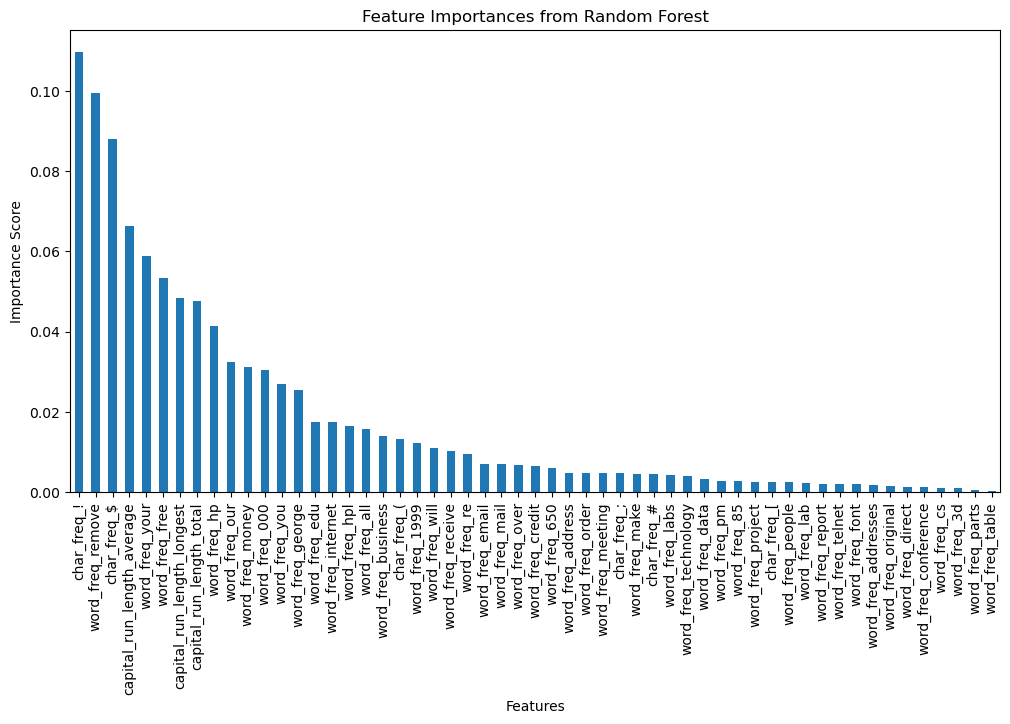

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Features')
# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Feature Importances from Random Forest.png"))
plt.show()


#### Keeping Only the Most Relevant Features:

In [39]:
# Set the number of top features to keep
n_top_features = 14  # Change this to however many features you want to keep

# Get the top n most important features
top_features = feature_importances.index[:n_top_features]

# Filter the original dataframe (X) to include only the top n features
X_top_features = X[top_features]

# Now you can proceed with this filtered X for further training
print(X_top_features.head())


   char_freq_!  word_freq_remove  char_freq_$  capital_run_length_average  \
0        0.778              0.00        0.000                       3.756   
1        0.372              0.21        0.180                       5.114   
2        0.276              0.19        0.184                       9.821   
3        0.137              0.31        0.000                       3.537   
4        0.135              0.31        0.000                       3.537   

   word_freq_your  word_freq_free  capital_run_length_longest  \
0            0.96            0.32                          61   
1            1.59            0.14                         101   
2            0.51            0.06                         485   
3            0.31            0.31                          40   
4            0.31            0.31                          40   

   capital_run_length_total  word_freq_hp  word_freq_our  word_freq_money  \
0                       278           0.0           0.32             

In [40]:
X_top_features

,char_freq_!,word_freq_remove,char_freq_$,capital_run_length_average,word_freq_your,word_freq_free,capital_run_length_longest,capital_run_length_total,word_freq_hp,word_freq_our,word_freq_money,word_freq_000,word_freq_you,word_freq_george
0,0.778,0.00,0.000,3.756,0.96,0.32,61,278,0.0,0.32,0.00,0.00,1.93,0.0
1,0.372,0.21,0.180,5.114,1.59,0.14,101,1028,0.0,0.14,0.43,0.43,3.47,0.0
2,0.276,0.19,0.184,9.821,0.51,0.06,485,2259,0.0,1.23,0.06,1.16,1.36,0.0
3,0.137,0.31,0.000,3.537,0.31,0.31,40,191,0.0,0.63,0.00,0.00,3.18,0.0
4,0.135,0.31,0.000,3.537,0.31,0.31,40,191,0.0,0.63,0.00,0.00,3.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.000,0.00,0.000,1.142,0.00,0.00,3,88,0.0,0.00,0.00,0.00,0.62,0.0
4597,0.353,0.00,0.000,1.555,2.00,0.00,4,14,0.0,0.00,0.00,0.00,6.00,0.0
4598,0.000,0.00,0.000,1.404,0.30,0.00,6,118,0.0,0.00,0.00,0.00,1.50,0.0
4599,0.000,0.00,0.000,1.147,0.32,0.00,5,78,0.0,0.32,0.00,0.00,1.93,0.0


In [41]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: Class, Length: 4601, dtype: int64

In [42]:
fe_dataset = X_top_features.join(y) 

#### Storing the feature selected data to a csv file in the project's data folder¶`

In [44]:
# Specify the file path where you want to save the file
file_path = os.path.join("C:/Users/nikde/Documents/UpGrad/spammail/data/processeddata", "feature_selected_data.csv")

# Save the datasets dataframe as a CSV file
fe_dataset.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index

#### Performing Train-Test split on the dataset after feature selection

In [45]:
# Split data into 80% training and 20% testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

In [46]:
# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train2.shape)
print('y_train', y_train2.shape)

# print dimension of test set
print('X_test', X_test2.shape)
print('y_test', y_test2.shape)

X_train (3680, 14)
y_train (3680,)
X_test (921, 14)
y_test (921,)


#### Model Training and Evaluation after Feature Selection

In [47]:
# Initialize the Random Forest model
rf_model_fs = RandomForestClassifier(random_state=42)

# Train the model
rf_model_fs.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred2 = rf_model_fs.predict(X_test2)


##### Accuracy

In [48]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test2, y_pred2))

Accuracy: 0.9424538545059717


##### F1 Score

In [49]:
# Classification Report
print("Classification Report:\n", classification_report(y_test2, y_pred2))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       531
           1       0.96      0.91      0.93       390

    accuracy                           0.94       921
   macro avg       0.94      0.94      0.94       921
weighted avg       0.94      0.94      0.94       921



#### Interpreting the results

#### An accuracy of 94% after feature selection (compared to the initial 96%) suggests that while the model has slightly lower accuracy, it's now simpler and possibly more generalizable due to the reduced feature set.

Here’s how you can interpret and proceed:

Slight Drop in Accuracy:
Simplified Model: Reducing features simplifies the model, but it might have slightly lost some predictive power, which is reflected in the drop from 96% to 94%. This is usually an acceptable trade-off if it leads to better generalization and faster training times.

Check Other Metrics:
Accuracy alone doesn't tell the full story. It’s important to evaluate other metrics like precision, recall, F1-score, or AUC to see if the model is actually improving in terms of handling specific cases (e.g., reducing false positives or false negatives).

Consider Hyperparameter Tuning:
After feature selection, the model's hyperparameters (like n_estimators, max_depth, etc.) may no longer be optimal. A fresh round of hyperparameter tuning might help recover or even improve the performance. You can use techniques like GridSearchCV or RandomizedSearchCV to fine-tune the model.

Cross-validation:
Use cross-validation (e.g., cross_val_score) to get a better estimate of how the model will perform on unseen data. This will help ensure that the 94% accuracy is stable and not due to randomness in the training/testing split.

##### Confusion Matrix

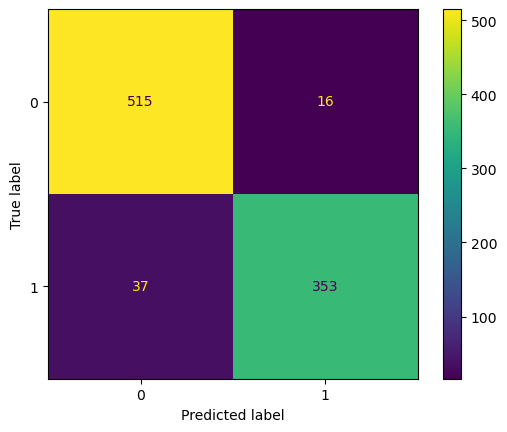

In [50]:
# Compute the confusion matrix
cm2 = confusion_matrix(y_test2, y_pred2, labels=rf_model_fs.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=rf_model_fs.classes_)

# Plot the confusion matrix
disp.plot()

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Confusion_Matrix after Feature Selection.png"))
plt.show()

##### Training Accuracy

In [51]:
train_accuracy = rf_model_fs.score(X_train2, y_train2)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9989130434782608


##### ROC Curve

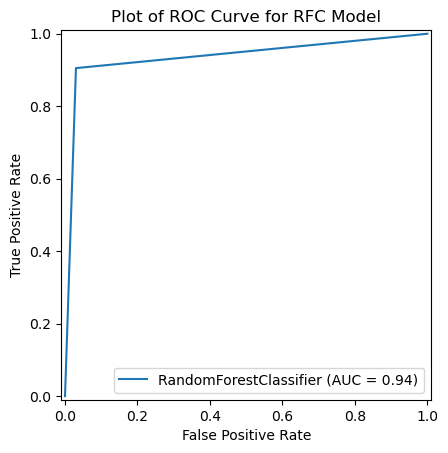

In [52]:
# Assuming y_true are the true binary labels
# and y_scores are the probability estimates of the positive class
fpr2, tpr2, thresholds2 = roc_curve(y_test2, y_pred2)
roc_auc2 = auc(fpr2, tpr2)

# Create RocCurveDisplay
display = RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2, estimator_name='RandomForestClassifier')

# Plot the ROC curve
display.plot()
plt.title("Plot of ROC Curve for RFC Model")

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "ROC Curve for Feature Selected Random Forest Model.png"))
plt.show()

##### Cross-Val Score

In [53]:
cv_scores2 = cross_val_score(rf_model_fs, X_top_features, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.94679696 0.9423913  0.95978261 0.97065217 0.83369565]
Mean CV Score: 0.9306637397913422


#### Interpreting the cross-validation scores can give you valuable insights into the model's performance. Here's a breakdown of what you're seeing:

1. Cross-Validation Scores:
The individual scores range from approximately 0.804 to 0.955.
The highest score (0.955) indicates strong performance in that particular fold of the cross-validation, while the lowest score (0.804) suggests a significant dip in performance.

2. Mean CV Score:
The mean cross-validation score is approximately 0.918. This score provides a general idea of how well the model is performing across different subsets of your data.
A mean score above 0.90 is generally considered good, indicating that the model is likely performing well on unseen data.

3. Observations:
Variability: The significant drop in one of the scores (0.804) compared to others suggests variability in model performance. This could indicate that the model struggles with certain subsets of the data, possibly due to class imbalance, noise, or other factors.
Robustness: While the mean score is good, the lower score might warrant further investigation. You might want to look into which specific data points or classes led to this lower performance to understand why it happened.

4. Next Steps:
Analyze the Fold with Low Performance: Investigate the data used in the fold with the lowest score. Check if there are any patterns, such as class imbalance or outliers, that could be affecting performance.
Tune Hyperparameters or Features: Consider further tuning the hyperparameters or revisiting feature selection to improve the model's robustness.

Cross-Validation Strategy: You might also explore different cross-validation strategies (e.g., stratified k-fold) to ensure that each fold is representative of the overall dataset.

Overall, while the mean score suggests a well-performing model, the variability highlights the importance of understanding the model's weaknesses and ensuring consistent performance across all data subsets.

#### It's generally better to perform hyperparameter tuning on the model after feature selection because:

Smaller Feature Set: Reducing the number of features makes the model simpler and reduces the search space for hyperparameters, leading to faster tuning.

Less Overfitting: By removing irrelevant or less important features, you're likely reducing the risk of overfitting, which can help hyperparameter tuning focus on truly impactful parameters.

Faster Computation: With fewer features, the Random Forest model will train faster, and consequently, the GridSearchCV process will be more efficient.

#### 1. Set up the parameter grid:
You need to define a grid of hyperparameters for the Random Forest classifier that you'd like to tune. Some commonly tuned hyperparameters for Random Forest include:

n_estimators: Number of trees in the forest.
max_depth: Maximum depth of the tree.
min_samples_split: Minimum number of samples required to split a node.
min_samples_leaf: Minimum number of samples required at a leaf node.
max_features: Number of features to consider for the best split.

In [54]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [10, 20, 30, None],        # Max depth of trees
    'max_features': ['sqrt', 'log2', None]  # Number of features considered for each split
}

#### 2. Set up the GridSearchCV:
You can now initialize the GridSearchCV object with your RandomForestClassifier and the parameter grid.

In [55]:

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model_fs, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')  # Use cross-validation (cv=5) and accuracy as the metric


cv=5: This specifies 5-fold cross-validation, which you’ve been using.
n_jobs=-1: This allows parallel computation, making the process faster.
verbose=2: This will print detailed logs of the training process.
scoring='accuracy': Use accuracy as the evaluation metric (you can also change this to other metrics like 'precision', 'recall', etc.).

#### 3. Fit GridSearchCV to the training data:
Once you set up the grid search, fit it to your training data.

In [56]:
# Fit the grid search to your training data with selected features
grid_search.fit(X_train2, y_train2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

#### 4. Check the best hyperparameters and the best score:

In [57]:
# Get the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 200}
Best CV Accuracy: 0.9415760869565218


##### Best Hyperparameters:

max_depth: 30: This indicates that the trees in the Random Forest can grow to a maximum depth of 30, which helps in capturing complex relationships in the data without overfitting too much.
max_features: 'sqrt': This setting means that for each split in the trees, a random subset of features (specifically, the square root of the total number of features) is considered. This is a common practice that helps reduce overfitting and increases diversity among the trees.
n_estimators: 200: This means that 200 trees in the forest can lead to better performance as it averages out the predictions and reduces variance.

#### Best CV Accuracy:
A mean CV accuracy of ~0.942 is quite good! This indicates that the model is likely to perform well on unseen data. It's a solid performance, especially if you're dealing with a classification problem.

#### 5. Evaluate the tuned model:
You can now evaluate the model with the best hyperparameters on your test set:

In [58]:
# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred3 = best_rf_model.predict(X_test2)

##### Accuracy

In [59]:
# Evaluate the model
accuracy = accuracy_score(y_test2, y_pred3)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.9413680781758957


##### F1 Score

In [60]:
# Print classification report for detailed metrics
print("Classification Report:\n", classification_report(y_test2, y_pred3))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       531
           1       0.96      0.90      0.93       390

    accuracy                           0.94       921
   macro avg       0.94      0.94      0.94       921
weighted avg       0.94      0.94      0.94       921



##### Confusion Matrix

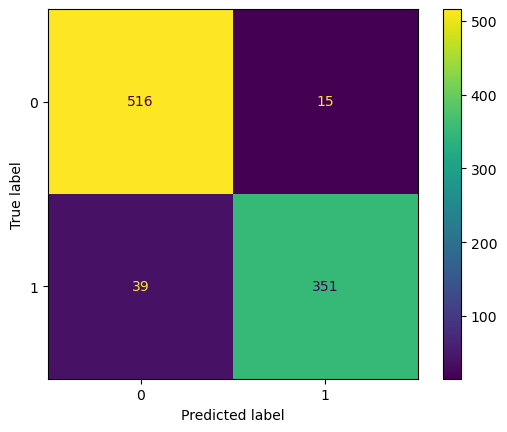

In [61]:
# Compute the confusion matrix
cm3 = confusion_matrix(y_test2, y_pred3, labels=best_rf_model.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=best_rf_model.classes_)

# Plot the confusion matrix
disp.plot()

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "Confusion_Matrix after Hyperparameter Tuning.png"))
plt.show()

##### ROC Curve

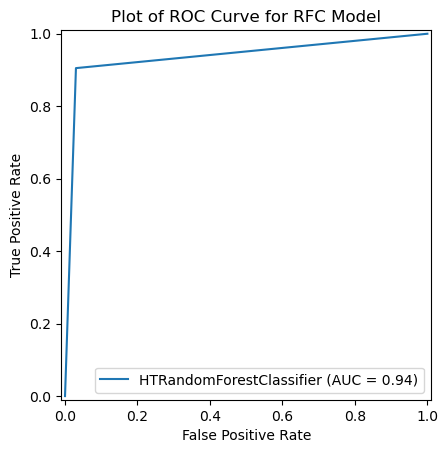

In [62]:
# Assuming y_true are the true binary labels
# and y_scores are the probability estimates of the positive class
fpr3, tpr3, thresholds3 = roc_curve(y_test2, y_pred2)
roc_auc3 = auc(fpr3, tpr3)

# Create RocCurveDisplay
display = RocCurveDisplay(fpr=fpr3, tpr=tpr3, roc_auc=roc_auc3, estimator_name='HTRandomForestClassifier')

# Plot the ROC curve
display.plot()
plt.title("Plot of ROC Curve for RFC Model")

# Save the figure automatically
plt.savefig(os.path.join(visuals_folder, "ROC Curve after Hyperparameter Tuning the RFC Model.png"))
plt.show()

In [63]:
# Define the folder where models will be saved
model_folder = "C:/Users/nikde/Documents/UpGrad/spammail/models"

In [64]:
# Save each model with a different name
joblib.dump(rf_model, os.path.join(model_folder, "Initial_model.pkl"))
joblib.dump(rf_model_fs, os.path.join(model_folder, "Feature_Selected_model.pkl"))
joblib.dump(best_rf_model, os.path.join(model_folder, "Hyperparameter_tuned_model.pkl"))

print("All models saved successfully!")

All models saved successfully!
